In [1]:
from google.colab import files

uploaded = files.upload()

Saving Preprocessed_DonorsChoose_dataset.csv to Preprocessed_DonorsChoose_dataset.csv


In [ ]:
import pandas as pd

df = pd.read_csv('Preprocessed_DonorsChoose_dataset.csv')
df.columns.tolist()

['id',
 'teacher_prefix',
 'school_state',
 'project_grade_category',
 'project_subject_categories',
 'project_subject_subcategories',
 'teacher_number_of_previously_posted_projects',
 'project_is_approved',
 'price',
 'quantity',
 'cleaned_titles',
 'cleaned_essays',
 'cleaned_summary',
 'isdigit_summary']

In [ ]:
df.head(3)

,id,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,cleaned_titles,cleaned_essays,cleaned_summary,isdigit_summary
0,p253737,mrs,in,grades_prek_2,literacy_language,esl_literacy,0,0,154.60,23,educational support english learners home,students english learners working english seco...,students_need_opportunities_practice_beginning...,0
1,p258326,mr,fl,grades_6_8,history_civics_health_sports,civics_government_teamsports,7,1,299.00,1,wanted projector hungry learners,students arrive school eager learn polite gene...,students_need_projector_help_viewing_education...,0
2,p182444,ms,az,grades_6_8,health_sports,health_wellness_teamsports,1,0,516.85,22,soccer equipment awesome middle school students,true champions not always ones win guts mia ha...,students_need_shine_guards_athletic_socks_socc...,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            109248 non-null  object 
 1   teacher_prefix                                109248 non-null  object 
 2   school_state                                  109248 non-null  object 
 3   project_grade_category                        109248 non-null  object 
 4   project_subject_categories                    109248 non-null  object 
 5   project_subject_subcategories                 109248 non-null  object 
 6   teacher_number_of_previously_posted_projects  109248 non-null  int64  
 7   project_is_approved                           109248 non-null  int64  
 8   price                                         109248 non-null  float64
 9   quantity                                      10

In [ ]:
text_cols = [c for c in df.columns if 'title' in c or 'essay' in c or 'summary' in c or 'description' in c]
df[text_cols].head(3)



,cleaned_titles,cleaned_essays,cleaned_summary,isdigit_summary
0,educational support english learners home,students english learners working english seco...,students_need_opportunities_practice_beginning...,0
1,wanted projector hungry learners,students arrive school eager learn polite gene...,students_need_projector_help_viewing_education...,0
2,soccer equipment awesome middle school students,true champions not always ones win guts mia ha...,students_need_shine_guards_athletic_socks_socc...,0


In [ ]:
text_cols = ['cleaned_titles', 'cleaned_essays', 'cleaned_summary']
df[text_cols].head(3)


,cleaned_titles,cleaned_essays,cleaned_summary
0,educational support english learners home,students english learners working english seco...,students_need_opportunities_practice_beginning...
1,wanted projector hungry learners,students arrive school eager learn polite gene...,students_need_projector_help_viewing_education...
2,soccer equipment awesome middle school students,true champions not always ones win guts mia ha...,students_need_shine_guards_athletic_socks_socc...


In [ ]:
for col in text_cols:
    df[col] = df[col].fillna('')
    print(f"--- {col} ---")
    print("Average word count:", df[col].str.split().apply(len).mean())
    print("Average character count:", df[col].str.len().mean())
    print("Unique entries:", df[col].nunique())
    print()


--- cleaned_titles ---
Average word count: 3.694831942003515
Average character count: 25.677220635618042
Unique entries: 91443

--- cleaned_essays ---
Average word count: 137.18418643819567
Average character count: 1007.0435614381956
Unique entries: 108314

--- cleaned_summary ---
Average word count: 1.0
Average character count: 90.77638949912127
Unique entries: 107885



In [ ]:
df['project_is_approved'].value_counts()


,count
project_is_approved,
1,92706
0,16542


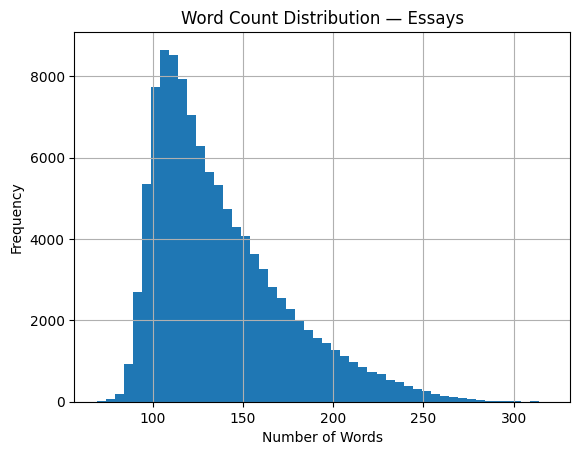

In [ ]:
import matplotlib.pyplot as plt

df['cleaned_essays'].str.split().apply(len).hist(bins=50)
plt.title('Word Count Distribution — Essays')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


Class counts:
 project_is_approved
1    92706
0    16542
Name: count, dtype: int64

Class ratio (%):
 project_is_approved
1    84.858304
0    15.141696
Name: proportion, dtype: float64


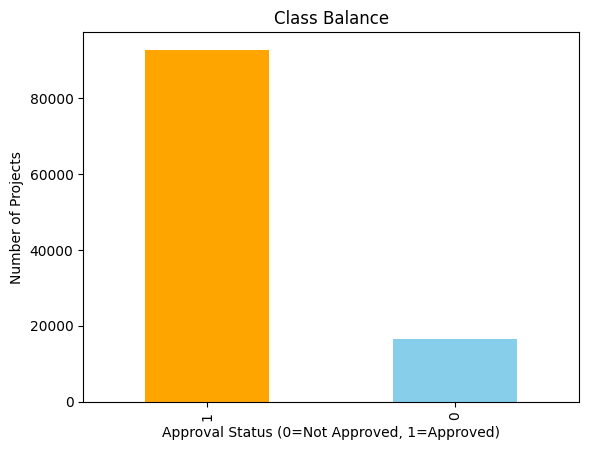

In [ ]:
class_counts = df['project_is_approved'].value_counts()
class_ratio = df['project_is_approved'].value_counts(normalize=True) * 100

print("Class counts:\n", class_counts)
print("\nClass ratio (%):\n", class_ratio)

ax = class_counts.plot(kind='bar', color=['orange', 'skyblue'])
ax.set_title('Class Balance')
ax.set_xlabel('Approval Status (0=Not Approved, 1=Approved)')
ax.set_ylabel('Number of Projects')
plt.show()


In [ ]:
df['text_all'] = (
    df['cleaned_titles'].fillna('') + ' ' +
    df['cleaned_summary'].fillna('') + ' ' +
    df['cleaned_essays'].fillna('')
)


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return ' '.join(tokens)

df['text_all'] = df['text_all'].apply(clean_text)
df['text_all'].head(3)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,text_all
0,educational support english learner home stude...
1,wanted projector hungry learner studentsneedpr...
2,soccer equipment awesome middle school student...


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text_all'])

# Vocabulary size
print(f"Total unique tokens: {len(tokenizer.word_index)}")


Total unique tokens: 157672


In [ ]:
from collections import Counter

all_text = ' '.join(df['cleaned_essays'].astype(str) + ' ' +
                    df['cleaned_titles'].astype(str) + ' ' +
                    df['cleaned_summary'].astype(str))

word_counts = Counter(all_text.split())
low_freq_words = {word for word, count in word_counts.items() if count < 5}

def remove_low_freq_words(text):
    return ' '.join([word for word in text.split() if word not in low_freq_words])

df['cleaned_essays'] = df['cleaned_essays'].apply(remove_low_freq_words)
df['cleaned_titles'] = df['cleaned_titles'].apply(remove_low_freq_words)
df['cleaned_summary'] = df['cleaned_summary'].apply(remove_low_freq_words)

df['tokens'] = df['cleaned_essays'].apply(lambda x: x.split())



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['text_all'])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['project_is_approved'], test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Logistic Regression Results")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print("Confusion Matrix:")
print(cm)



Logistic Regression Results
Accuracy:  0.8496
Precision: 0.8546
Recall:    0.9913
F1-Score:  0.9179
Confusion Matrix:
[[  191  3125]
 [  161 18373]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_tfidf, df['project_is_approved'], test_size=0.2, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_rf, y_train_rf)

y_pred_rf = rf_clf.predict(X_test_rf)

print("Random Forest Results")
print("Accuracy:", accuracy_score(y_test_rf, y_pred_rf))
print("Precision:", precision_score(y_test_rf, y_pred_rf))
print("Recall:", recall_score(y_test_rf, y_pred_rf))
print("F1-Score:", f1_score(y_test_rf, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test_rf, y_pred_rf))


Random Forest Results
Accuracy: 0.8469107551487414
Precision: 0.8482916762210502
Recall: 0.9980036689327721
F1-Score: 0.9170777659337118
Confusion Matrix:
 [[    8  3308]
 [   37 18497]]


In [ ]:
!pip install gensim --upgrade


In [ ]:
import gensim.downloader as api
from numpy import mean
import numpy as np

w2v_model = api.load("glove-wiki-gigaword-100")

def get_avg_w2v(text, model, vector_size=100):
    words = text.split()
    vectors = [model[w] for w in words if w in model]
    return mean(vectors, axis=0) if len(vectors) > 0 else np.zeros(vector_size)

X_w2v = np.vstack(df['text_all'].apply(lambda x: get_avg_w2v(x, w2v_model)))


[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
from sklearn.model_selection import train_test_split

X_tfidf_train, X_tfidf_test, X_w2v_train, X_w2v_test, y_train, y_test = train_test_split(
    X_tfidf, X_w2v, df['project_is_approved'], test_size=0.2, random_state=42
)


In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# TF-IDF branch
input_tfidf = Input(shape=(X_tfidf_train.shape[1],))
x_tfidf = Dense(256, activation='relu')(input_tfidf)
x_tfidf = Dropout(0.3)(x_tfidf)

# Word2Vec branch
input_w2v = Input(shape=(X_w2v_train.shape[1],))
x_w2v = Dense(128, activation='relu')(input_w2v)
x_w2v = Dropout(0.3)(x_w2v)

# Merge
merged = Concatenate()([x_tfidf, x_w2v])
x = Dense(128, activation='relu')(merged)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=[input_tfidf, input_w2v], outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(
    [X_tfidf_train, X_w2v_train], y_train,
    validation_data=([X_tfidf_test, X_w2v_test], y_test),
    epochs=5, batch_size=128
)


Epoch 1/5
683/683 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.8436 - loss: 0.4149 - val_accuracy: 0.8494 - val_loss: 0.3805
Epoch 2/5
683/683 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.8563 - loss: 0.3628 - val_accuracy: 0.8509 - val_loss: 0.3795
Epoch 3/5
683/683 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - accuracy: 0.8634 - loss: 0.3485 - val_accuracy: 0.8480 - val_loss: 0.3864
Epoch 4/5
683/683 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.8917 - loss: 0.2940 - val_accuracy: 0.8425 - val_loss: 0.4186
Epoch 5/5
683/683 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.9270 - loss: 0.2084 - val_accuracy: 0.8337 - val_loss: 0.4723


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

y_pred_dl = (model.predict([X_tfidf_test, X_w2v_test]) > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_dl)
precision = precision_score(y_test, y_pred_dl)
recall = recall_score(y_test, y_pred_dl)
f1 = f1_score(y_test, y_pred_dl)
cm = confusion_matrix(y_test, y_pred_dl)

print(f"Deep Learning Model Results")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print("Confusion Matrix:")
print(cm)



683/683 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step
Deep Learning Model Results
Accuracy:  0.8337
Precision: 0.8677
Recall:    0.9487
F1-Score:  0.9064
Confusion Matrix:
[[  634  2682]
 [  951 17583]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_log = log_reg.predict(X_test)

accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)


#Random Forest
y_pred_rf = rf_clf.predict(X_test_rf)

accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
precision_rf = precision_score(y_test_rf, y_pred_rf)
recall_rf = recall_score(y_test_rf, y_pred_rf)
f1_rf = f1_score(y_test_rf, y_pred_rf)

#Deep Learning
y_pred_dl = (model.predict([X_tfidf_test, X_w2v_test]) > 0.5).astype(int)

accuracy_dl = accuracy_score(y_test, y_pred_dl)
precision_dl = precision_score(y_test, y_pred_dl)
recall_dl = recall_score(y_test, y_pred_dl)
f1_dl = f1_score(y_test, y_pred_dl)



683/683 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


In [ ]:
import pandas as pd

metrics = {
    'Model': ['Logistic Regression', 'Random Forest', 'Deep Learning'],
    'Accuracy': [accuracy_log, accuracy_rf, accuracy_dl],
    'Precision': [precision_log, precision_rf, precision_dl],
    'Recall': [recall_log, recall_rf, recall_dl],
    'F1-Score': [f1_log, f1_rf, f1_dl]
}

df_metrics = pd.DataFrame(metrics)
print(df_metrics)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.849611   0.854638  0.991313  0.917916
1        Random Forest  0.846911   0.848292  0.998004  0.917078
2        Deep Learning  0.833730   0.867654  0.948689  0.906364


683/683 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step


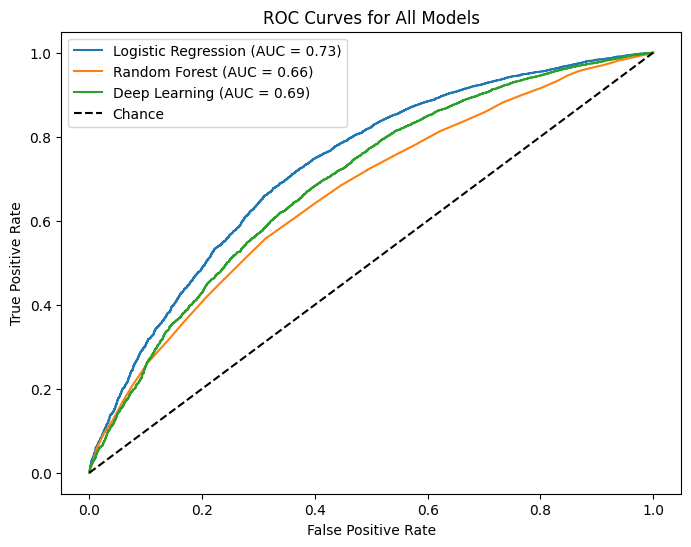

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Logistic Regression
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

# Random Forest
y_prob_rf = rf_clf.predict_proba(X_test_rf)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test_rf, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Deep Learning
y_prob_dl = model.predict([X_tfidf_test, X_w2v_test]).ravel()
fpr_dl, tpr_dl, _ = roc_curve(y_test, y_prob_dl)
roc_auc_dl = auc(fpr_dl, tpr_dl)
plt.plot(fpr_dl, tpr_dl, label=f'Deep Learning (AUC = {roc_auc_dl:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.show()


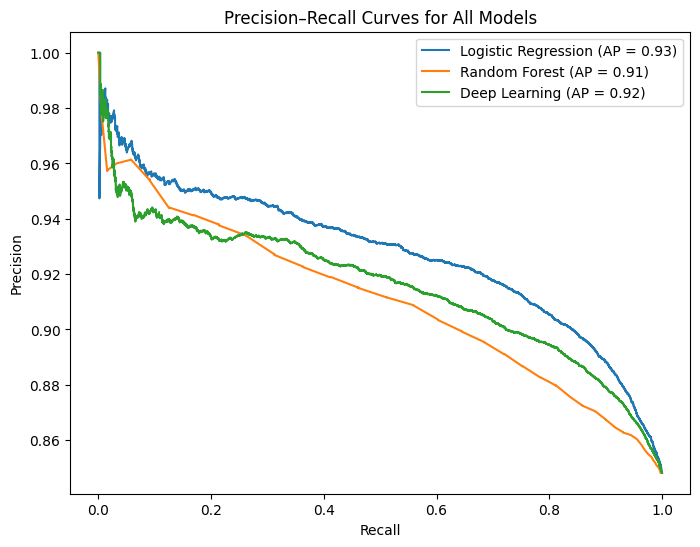

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(8, 6))

# Logistic Regression
prec_lr, rec_lr, _ = precision_recall_curve(y_test, y_prob_lr)
ap_lr = average_precision_score(y_test, y_prob_lr)
plt.plot(rec_lr, prec_lr, label=f'Logistic Regression (AP = {ap_lr:.2f})')

# Random Forest
prec_rf, rec_rf, _ = precision_recall_curve(y_test_rf, y_prob_rf)
ap_rf = average_precision_score(y_test_rf, y_prob_rf)
plt.plot(rec_rf, prec_rf, label=f'Random Forest (AP = {ap_rf:.2f})')

# Deep Learning
prec_dl, rec_dl, _ = precision_recall_curve(y_test, y_prob_dl)
ap_dl = average_precision_score(y_test, y_prob_dl)
plt.plot(rec_dl, prec_dl, label=f'Deep Learning (AP = {ap_dl:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curves for All Models')
plt.legend()
plt.show()


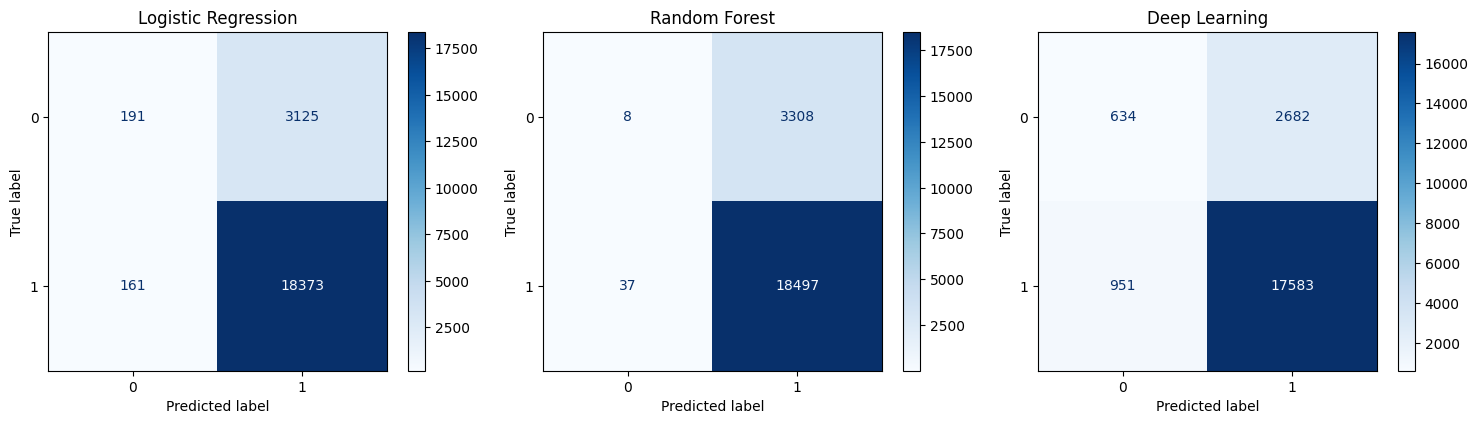

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Logistic Regression
ConfusionMatrixDisplay.from_predictions(y_test, log_reg.predict(X_test), ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression')

# Random Forest
ConfusionMatrixDisplay.from_predictions(y_test_rf, rf_clf.predict(X_test_rf), ax=axes[1], cmap='Blues')
axes[1].set_title('Random Forest')

# Deep Learning
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dl, ax=axes[2], cmap='Blues')
axes[2].set_title('Deep Learning')

plt.tight_layout()
plt.show()
